In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
net_df = pd.read_csv('datasets/netflix_titles.csv')


In [15]:
netflix_df = net_df.copy()

In [16]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


# Data Preparation and Cleaning

In [17]:
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [18]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 395.5+ KB


In [19]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

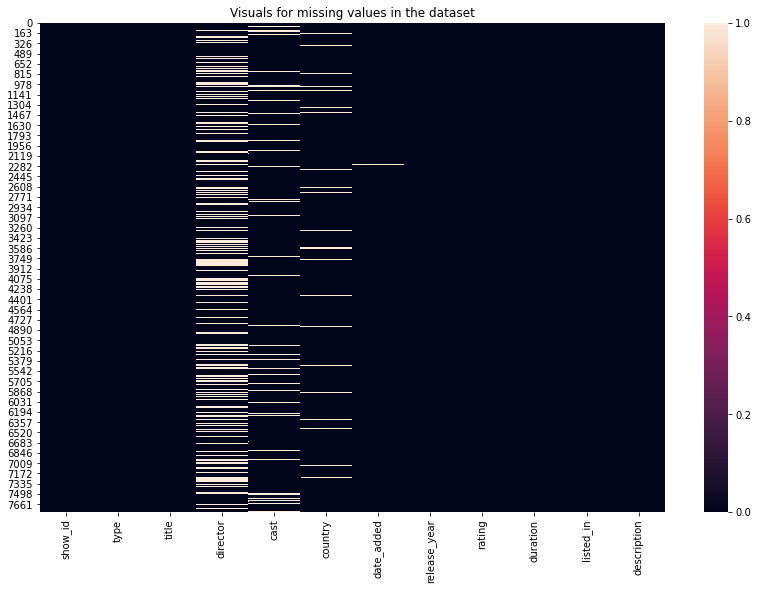

In [20]:
plt.figure(figsize=(14,9));
plt.title('Visuals for missing values in the dataset');
sns.heatmap(netflix_df.isna());

In [21]:
#Taking care of missing values in the director, cast, country and date added columns.From the heatmap above we can see missing
#valuesin the mentioned columns so we will replace that with the mode for each respect column. When working with in your real
#life jobs for eaxample at your job, the appropriate thing to do might be dropping some of these values as it might contribute to
#flawed analytics

In [22]:
netflix_df['director']= netflix_df['director'].replace(np.nan, netflix_df['director'].mode()[0])
netflix_df['cast']= netflix_df['cast'].replace(np.nan, netflix_df['cast'].mode()[0])
netflix_df['date_added']= netflix_df['date_added'].replace(np.nan, netflix_df['date_added'].mode()[0])
netflix_df['country']= netflix_df['country'].replace(np.nan, netflix_df['country'].mode()[0])
netflix_df['rating']= netflix_df['rating'].replace(np.nan, netflix_df['rating'].mode()[0])

In [23]:
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
netflix_df.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,False,False,False,False,False,False,False,False,False,False,False,False
7783,False,False,False,False,False,False,False,False,False,False,False,False
7784,False,False,False,False,False,False,False,False,False,False,False,False
7785,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
#output will show no null values
nan_df = netflix_df[netflix_df.isna().any(axis=1)]
nan_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [26]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Exploratory Data Analysis

# Which type (movies,shows) was produced more?

In [27]:
 netflix_df['type'].mode()

0    Movie
dtype: object

In [28]:
#how many movies and tv shows were produced?
netflix_df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

# Which rating had most productions?


In [29]:
netflix_df['rating'].mode()

0    TV-MA
dtype: object

In [30]:
#what types of ratings were produced in general?
netflix_df['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [31]:
#to get a better understanding a dataset with some of the ratings and their meanings are below

In [32]:
ratings_df = pd.read_csv('./datasets/ratings.csv')
ratings_df

,Rating,Meaning
0,G,G - Genera Audience. All Audiences are admitted.
1,PG,PG - Parental Guidance Suggested. Some materia...
2,PG-13,PG - 13 - Parents Strongly Cautioned. Some mat...
3,R,R - Restricted. Under 17 requires accompanying...
4,NC-17,NC -17 - Adults only. No one 17 or under is ad...
5,TV-Y,TV-Y - Aimed at very young audience including ...
6,TV-Y7,TV-Y7 - Program approriate for children who ar...
7,TV-G,TV - G suitable for all ages
8,TV-14,TV-14 - This programs are unsuitable for child...
9,TV-MA,TV-MA - This programs are suitable for matured...


# Which director had the most featuring?


In [33]:
netflix_df.director.value_counts()

Raúl Campos, Jan Suter    2407
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
                          ... 
Amy Poehler                  1
Partho Sen-Gupta             1
Marco Risi                   1
Hayao Miyazaki               1
Kanika Batra                 1
Name: director, Length: 4049, dtype: int64

# Which country was most movies produced in?


In [34]:
netflix_df.country.value_counts()

United States                      3062
India                               923
United Kingdom                      397
Japan                               226
South Korea                         183
                                   ... 
Romania, Bulgaria, Hungary            1
Ireland, United States                1
Denmark, United Kingdom, Sweden       1
France, United States, Mexico         1
United Kingdom, South Korea           1
Name: country, Length: 681, dtype: int64

# Which year had the most movie released?

In [35]:
netflix_df.groupby('release_year').sum()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
1925,s4868,TV Show,Pioneers: First Women Filmmakers*,"Raúl Campos, Jan Suter",David Attenborough,United States,"December 30, 2018",TV-14,1 Season,TV Shows,This collection restores films from women who ...
1942,s4961s6118,MovieMovie,Prelude to WarThe Battle of Midway,Frank CapraJohn Ford,"David AttenboroughHenry Fonda, Jane Darwell",United StatesUnited States,"March 31, 2017March 31, 2017",TV-14TV-14,52 min18 min,"Classic Movies, DocumentariesClassic Movies, D...",Frank Capra's documentary chronicles the rise ...
1943,s7343s7617s7680,MovieMovieMovie,Undercover: How to Operate Behind Enemy LinesW...,"John FordFrank Capra, Anatole LitvakJohn Huston",David AttenboroughDavid AttenboroughDavid Atte...,United StatesUnited StatesUnited States,"March 31, 2017March 31, 2017March 31, 2017",TV-PGTV-PGTV-PG,61 min82 min45 min,"Classic Movies, DocumentariesDocumentariesDocu...",This World War II-era training film dramatizes...
1944,s6658s6700s7269,MovieMovieMovie,The Memphis Belle: A Story of a\nFlying Fortre...,"William WylerStuart HeislerFrank Capra, John H...",David AttenboroughDavid AttenboroughBurgess Me...,"United StatesUnited StatesUnited States, Unite...","March 31, 2017March 31, 2017March 31, 2017",TV-PGTV-14TV-14,40 min40 min76 min,"Classic Movies, DocumentariesClassic Movies, D...",This documentary centers on the crew of the B-...
1945,s3426s4437s5372,MovieMovieMovie,Know Your Enemy - JapanNazi Concentration Camp...,"Frank Capra, Joris IvensGeorge StevensJohn Huston","Walter Huston, Dana AndrewsDavid AttenboroughD...",United StatesUnited StatesUnited States,"March 31, 2017March 31, 2017March 31, 2017",TV-14TV-MATV-14,63 min59 min32 min,"Classic Movies, DocumentariesClassic Movies, D...",Though culturally insensitive by modern standa...
...,...,...,...,...,...,...,...,...,...,...,...
2017,s11s20s23s24s34s42s48s49s59s61s68s88s90s94s111...,MovieMovieMovieMovieMovieMovieMovieMovieTV Sho...,1922'89​Maj Rati ​​Keteki​Mayurakshi#realityhi...,"Zak HilditchRaúl Campos, Jan SuterSantwana Bar...","Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United StatesUnited KingdomIndiaIndiaUnited St...,"October 20, 2017May 16, 2018September 15, 2018...",TV-MATV-PGTV-14TV-14TV-14TV-MATV-14TV-14TV-14T...,103 min87 min117 min100 min99 min106 min105 mi...,"Dramas, ThrillersSports MoviesDramas, Internat...",A farmer pens a confession admitting to his wi...
2018,s12s14s17s18s21s22s32s35s52s53s70s77s83s87s93s...,TV ShowMovieTV ShowMovieMovieMovieMovieMovieTV...,"19832,215Feb-0922-Jul​​Kuch Bheege Alfaaz​Goli...","Raúl Campos, Jan SuterNottapon BoonprakobRaúl ...","Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United StatesThailandUnited StatesNorw...","November 30, 2018March 1, 2019March 20, 2019Oc...",TV-MATV-MATV-14RTV-14TV-14TV-GTV-14TV-14TV-MAT...,1 Season89 min1 Season144 min110 min128 min102...,"Crime TV Shows, International TV Shows, TV Dra...","In this dark alt-history thriller, a naïve law..."
2019,s7s9s13s15s19s29s40s65s76s86s109s110s113s115s1...,MovieMovieTV ShowMovieMovieMovieMovieTV ShowMo...,1227061994302215-Aug#AnneFrank - Parallel Stor...,Yasir Al YasiriShravan KumarDiego Enrique Osor...,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",EgyptIndiaMexicoUnited StatesIndiaItalySpainUn...,"June 1, 2020April 1, 2019May 17, 2019March 19,...",TV-MATV-14TV-MARTV-14TV-14TV-MATV-MATV-MATV-MA...,95 min118 min1 Season91 min124 min95 min81 min...,"Horror Movies, International MoviesHorror Movi...","After an awful accident, a couple admitted to ..."


In [36]:
# Years that had productions
netflix_df.release_year.unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943], dtype=int64)

In [37]:
# Year that had the most productions
netflix_df['release_year'].value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

# Which genre had the most listings?

In [38]:
#Various Genres that were listed
netflix_df.listed_in.unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [39]:
netflix_df.listed_in.value_counts()

Documentaries                                            334
Stand-Up Comedy                                          321
Dramas, International Movies                             320
Comedies, Dramas, International Movies                   243
Dramas, Independent Movies, International Movies         215
                                                        ... 
Dramas, Faith & Spirituality, Independent Movies           1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
British TV Shows, Classic & Cult TV, Kids' TV              1
Anime Features, International Movies                       1
Action & Adventure, Romantic Movies, Sci-Fi & Fantasy      1
Name: listed_in, Length: 492, dtype: int64

# Data Visualization

In [40]:
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

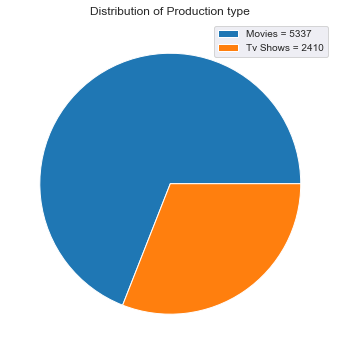

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6));
plt.title('Distribution of Production type');
plt.pie(netflix_df.type.value_counts());
plt.legend(['Movies = 5337','Tv Shows = 2410']);

In [42]:
#ratings 
rating_list = netflix_df.rating.value_counts()
rating_list

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


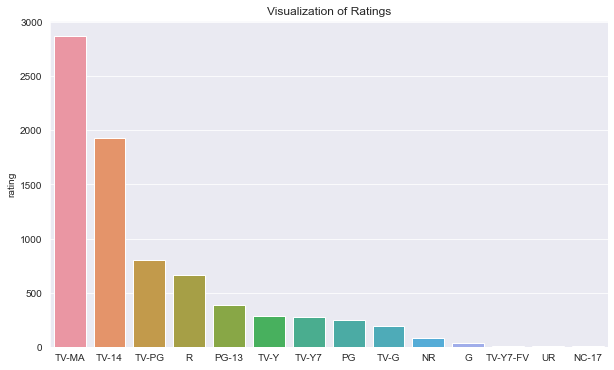

In [44]:
plt.figure(figsize=(10,6));
plt.title('Visualization of Ratings')
sns.barplot(rating_list.index,rating_list);

In [50]:
director_list_10 = netflix_df.director.value_counts().head(10)
director_list_10

Raúl Campos, Jan Suter    2407
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Steven Spielberg            10
David Dhawan                 9
Hakan Algül                  8
Name: director, dtype: int64

In [58]:
campos_suter_df = netflix_df[netflix_df.director == 'Raúl Campos, Jan Suter']
campos_suter_df 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
11,s12,TV Show,1983,"Raúl Campos, Jan Suter","Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
16,s17,TV Show,Feb-09,"Raúl Campos, Jan Suter","Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
19,s20,Movie,'89,"Raúl Campos, Jan Suter","Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,"Raúl Campos, Jan Suter","Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...
...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,"Raúl Campos, Jan Suter","Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,"Raúl Campos, Jan Suter",David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,"Raúl Campos, Jan Suter","Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7784,s7785,Movie,Zulu Man in Japan,"Raúl Campos, Jan Suter",Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


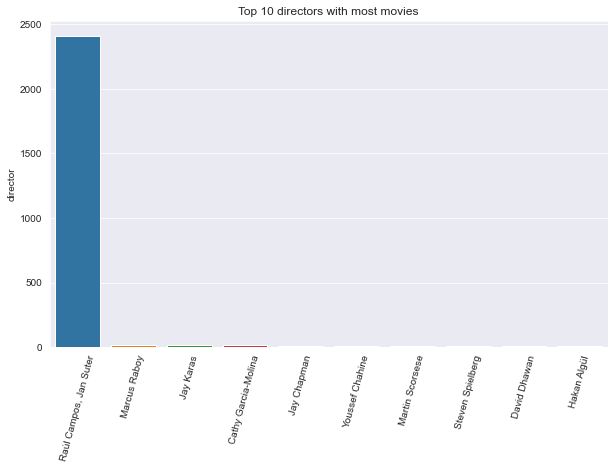

In [104]:
plt.figure(figsize=(10,6));
plt.title('Top 10 directors with most movies');
plt.xticks(rotation = 75)
sns.barplot(x=director_list_10.index,y=director_list_10);

In [60]:
#Did these two directors(Raul Campos and Jan Suter) direct single movies or tv shows?
campos_suter_df.type.value_counts()

TV Show    2226
Movie       181
Name: type, dtype: int64

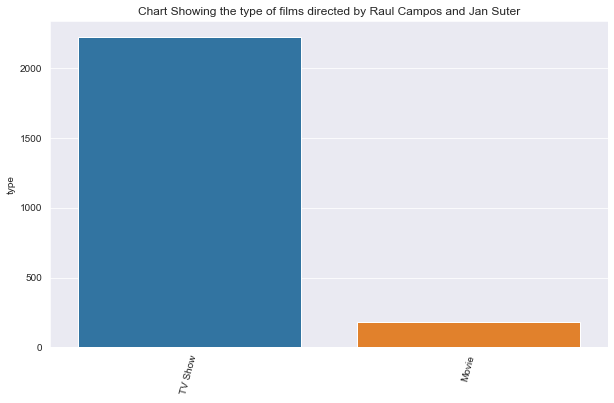

In [103]:
plt.figure(figsize=(10,6));
plt.title('Chart Showing the type of films directed by Raul Campos and Jan Suter');
plt.xticks(rotation = 75)
sns.barplot(x=campos_suter_df.type.value_counts().index,y=campos_suter_df.type.value_counts());

# Countries that had the most productions(Visuals)

In [106]:
netflix_countries = netflix_df['country'].value_counts()
netflix_countries

United States                      3062
India                               923
United Kingdom                      397
Japan                               226
South Korea                         183
                                   ... 
Romania, Bulgaria, Hungary            1
Ireland, United States                1
Denmark, United Kingdom, Sweden       1
France, United States, Mexico         1
United Kingdom, South Korea           1
Name: country, Length: 681, dtype: int64

In [93]:
netflix_countries_20 = netflix_df['country'].value_counts().head(20)
netflix_countries_20

United States                    3062
India                             923
United Kingdom                    397
Japan                             226
South Korea                       183
Canada                            177
Spain                             134
France                            115
Egypt                             101
Mexico                            100
Turkey                            100
Australia                          83
Taiwan                             78
Brazil                             72
Philippines                        71
Nigeria                            70
Indonesia                          70
United Kingdom, United States      64
Germany                            61
United States, Canada              60
Name: country, dtype: int64

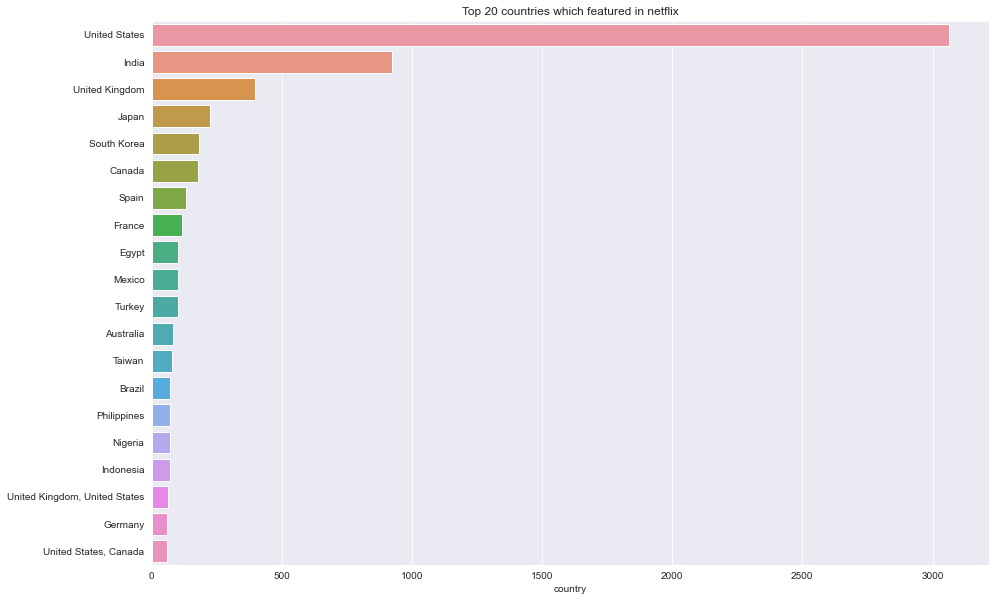

In [161]:
plt.figure(figsize=(15,10));
plt.title('Top 20 countries which featured in netflix');
#plt.xticks(rotation = 75)
sns.barplot(x=netflix_countries_20,y=netflix_countries_20.index);

In [110]:
united_states_df = netflix_df[netflix_df.country == 'United States']
united_states

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",2019,R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...
...,...,...,...,...,...,...,...,...,...,...,...,...
7774,s7775,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
7777,s7778,TV Show,Zombie Dumb,"Raúl Campos, Jan Suter",David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


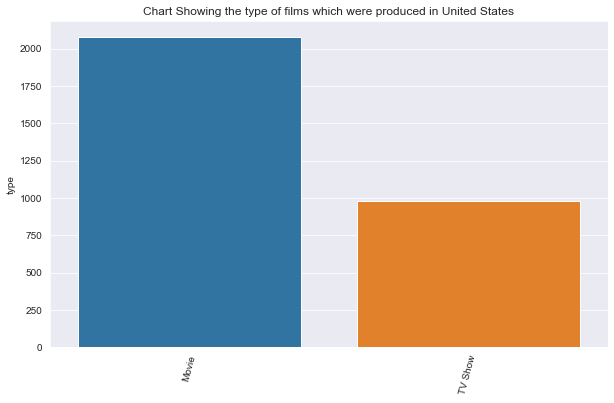

In [113]:
plt.figure(figsize=(10,6));
plt.title('Chart Showing the type of films which were produced in United States');
plt.xticks(rotation = 75)
sns.barplot(x=united_states_df.type.value_counts().index,y=united_states_df.type.value_counts());

# Year that had the most releases(Visuals)

In [124]:
year_df = netflix_df.release_year.value_counts()
year_df

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1966       1
1947       1
1959       1
1964       1
1925       1
Name: release_year, Length: 73, dtype: int64

In [132]:
year_df_20 = netflix_df.release_year.value_counts().head(20).sort_index()
year_df_20

2001      36
2002      45
2003      49
2004      59
2005      73
2006      85
2007      85
2008     125
2009     137
2010     173
2011     166
2012     219
2013     267
2014     334
2015     541
2016     882
2017    1012
2018    1121
2019     996
2020     868
Name: release_year, dtype: int64

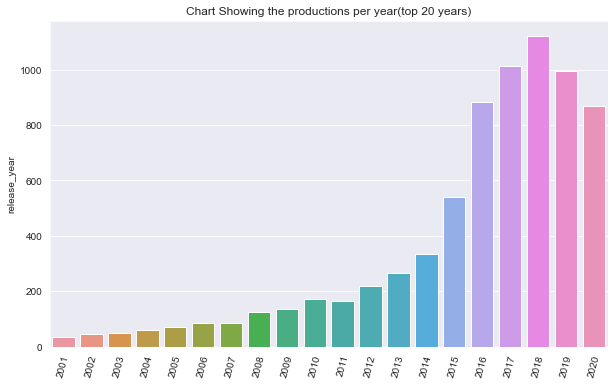

In [152]:
plt.figure(figsize=(10,6));
plt.title('Chart Showing the productions per year(top 20 years)');
plt.xticks(rotation = 75)
sns.barplot(x=year_df_20.index,y=year_df_20);

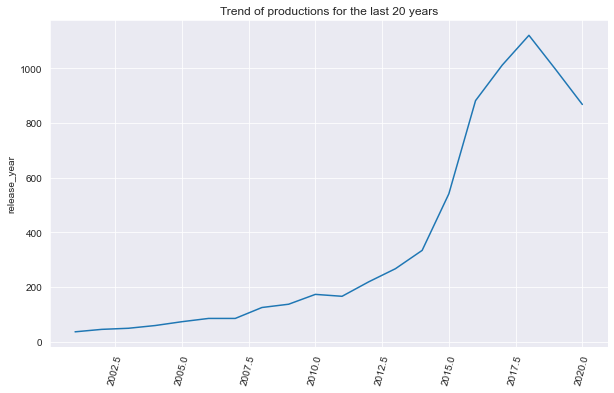

In [153]:
plt.figure(figsize=(10,6));
plt.title('Trend of productions for the last 20 years');
plt.xticks(rotation = 75)
sns.lineplot(x=year_df_20.index,y=year_df_20);

# Genre that had most listings

In [156]:
listings_10 = netflix_df.listed_in.value_counts().head(10)
listings_10

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            205
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: listed_in, dtype: int64

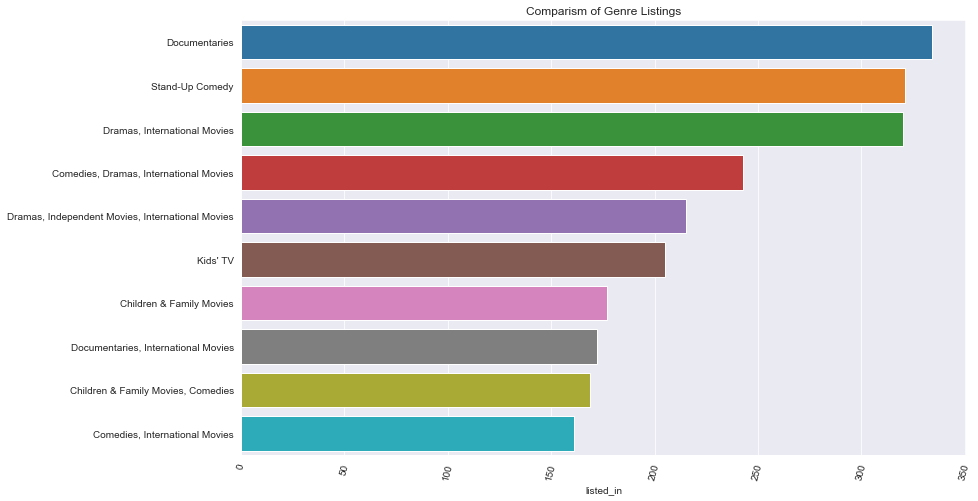

In [162]:
plt.figure(figsize=(13,8));
plt.title('Comparism of Genre Listings');
plt.xticks(rotation = 75)
sns.barplot(y=listings_10.index,x=listings_10);

# Conclusion

Generally from the data, more movies were produced as compared to Tv shows. 5337 movies were produced and 2410 shows were
produced as well.

The rating TV-MA(which means programs meant for mature audience) had the most productions numbering upto 2870. TV-14(programs suitable for children who are 14 and above) followed 1931. This shows that generally, programs suitable for some teenagers and matured content featured the most on netflix.

The directors column had Raul Campos and Jan Suter directing most of the productions that featured on netflix in different countries over the period of time the data was collected. Jointly(a few had them partnering with other directors) they directed 2407 productions that featured on netflix, out of which 2226 were Tv shows and 181 were movies.

Countrywise, United States led all other countries which featured in netflix productions with 3062 featurings(out of which 2080 were movies and 982 Tv shows) followed by India and United Kingdom who had total featuring of 923 and 397 respectively.

Yearwise, 2018 had the most release of 1121 and closely followed by 2017 and 2019 which had 1012 and 996 respectively. The trend of the data shows that productions that featured on netflix started rising significantly from 2001 till 2018 and dropped for 2019 and 202.

Looking at the genres, documentaries was at the top of the list (334 documentaries) but closely followed by stand-up comedy and Dramas which doubled as International Movies(321 and 320 respectively.)